In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('EDUCAUSE_Survey.xls')
df    #315 rows × 20 columns

,Mid-term_homework_score(1),Avg_discussion_posts(1),Participation_score(1),Avg_quiz_score(1),Mid-term_exam_score(1),Avg_homework_submit_times(1),Course_visits(1),Avg_homework_score(1),Course_visit_time(1),Homework_complete_rate(1),Mid-term_homework_score(2),Avg_discussion_posts(2),Participation_score(2),Avg_quiz_score(2),Mid-term_exam_score(2),Avg_homework_submit_times(2),Course_visits(2),Avg_homework_score(2),Course_visit_time(2),Homework_complete_rate(2)
0,2,7,5,10,8,1,9,3,6,4,10,9,8,7,6,5,4,3,2,1
1,3,5,4,10,9,1,7,8,6,2,10,7,9,6,5,4,1,3,8,2
2,7,8,10,2,4,1,3,5,9,6,5,6,7,10,9,4,3,8,2,1
3,4,5,9,10,7,1,6,3,8,2,10,9,4,2,3,8,5,7,1,6
4,6,3,10,8,2,7,1,4,9,5,1,2,3,4,6,7,8,9,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,4,6,7,10,9,1,8,2,5,3,10,7,8,9,5,4,6,3,2,1
311,4,5,9,8,6,1,7,2,10,3,9,8,3,2,7,10,6,5,4,1
312,7,1,9,10,2,5,3,6,8,4,10,1,3,2,5,6,7,4,9,8
313,8,9,5,2,3,6,10,1,4,7,7,6,9,5,10,8,3,2,1,4


In [2]:
df_before_model = df.iloc[:, :10]
df_after_model = df.iloc[:, 10:]

In [3]:
columns = list(df.columns[:10])

#scores on each factor of model, before_model, after_model
model_sum = []
for i in range(10, 0, -1):
    model_sum.append(i*315)

sum_before_model = (df_before_model.sum(axis=0)).tolist()
sum_after_model = (df_after_model.sum(axis=0)).tolist()

print(model_sum)
print(sum_before_model)
print(sum_after_model)

[3150, 2835, 2520, 2205, 1890, 1575, 1260, 945, 630, 315]
[1425, 1274, 2052, 2708, 1976, 1049, 1691, 1532, 2296, 1322]
[2759, 2067, 2196, 1653, 1920, 2089, 1299, 1172, 1339, 831]


In [4]:
all_rows = [sum_before_model, sum_after_model]
df_score = pd.DataFrame(all_rows, columns=df_before_model.columns)
df_score.index = ['BEFORE', 'AFTER']
df_score

,Mid-term_homework_score(1),Avg_discussion_posts(1),Participation_score(1),Avg_quiz_score(1),Mid-term_exam_score(1),Avg_homework_submit_times(1),Course_visits(1),Avg_homework_score(1),Course_visit_time(1),Homework_complete_rate(1)
BEFORE,1425,1274,2052,2708,1976,1049,1691,1532,2296,1322
AFTER,2759,2067,2196,1653,1920,2089,1299,1172,1339,831


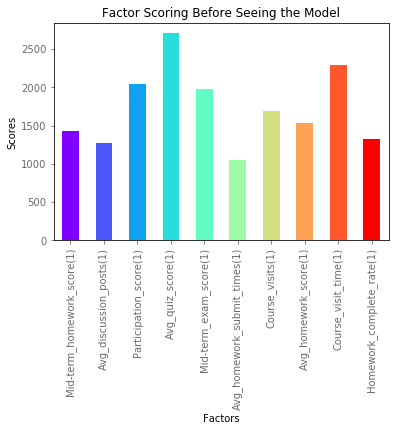

In [12]:
import matplotlib
import matplotlib.pyplot as plt

before = pd.Series(sum_before_model,
                   index = df_before_model.columns)

#Set descriptions:
plt.title("Factor Scoring Before Seeing the Model")
plt.ylabel('Scores')
plt.xlabel('Factors')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='dimgrey')
ax.tick_params(axis='y', colors='dimgrey')

#Plot the data:
my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(sum_before_model)))  #red, green, blue, black, etc.

before.plot.bar(
    x='factor', y='score',  
    color=my_colors,
)

plt.show()

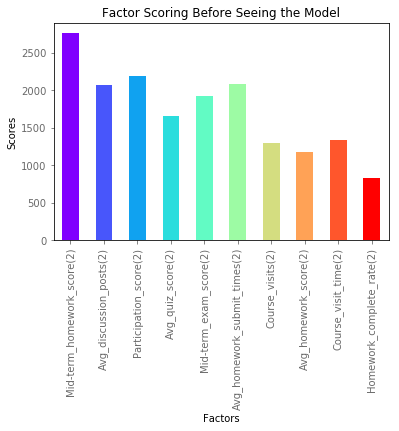

In [6]:
after = pd.Series(sum_after_model,
                   index = df_after_model.columns)

#Set descriptions:
plt.title("Factor Scoring Before Seeing the Model")
plt.ylabel('Scores')
plt.xlabel('Factors')

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='dimgrey')
ax.tick_params(axis='y', colors='dimgrey')

#Plot the data:
my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(sum_after_model)))  #red, green, blue, black, etc.

after.plot.bar(
    x='factor', y='score',  
    color=my_colors,
)

plt.show()

In [7]:
from scipy.stats import chi2_contingency

#Defining the table
data = [sum_before_model, sum_after_model]
stat, p, dof, expected = chi2_contingency(data)
  
#Interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')    #There is a significant relationship between ranking and seeing model
else:
    print('Independent (H0 holds true)')    #There is no significant relationship between ranking and seeing model

p value is 0.0
Dependent (reject H0)


In [8]:
argsort_before_model = np.argsort(sum_before_model)
argsort_after_model = np.argsort(sum_after_model)
print(argsort_before_model)
print(argsort_after_model)

[5 1 9 0 7 6 4 2 8 3]
[9 7 6 8 3 4 1 5 2 0]


In [9]:
#ranking on factor importance of model, before_model, after_model
model_rank = [*range(1,11)]
rank_before_model = [*range(1,11)]
rank_after_model = [*range(1,11)]

for i, k in enumerate(argsort_before_model.tolist()):
    rank_before_model[k] = 10-i

for i, k in enumerate(argsort_after_model.tolist()):
    rank_after_model[k] = 10-i    

print(model_rank)
print(rank_before_model)
print(rank_after_model)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[7, 9, 3, 1, 4, 10, 5, 6, 2, 8]
[1, 4, 2, 6, 5, 3, 8, 9, 7, 10]


In [10]:
from scipy.stats import kendalltau
print(kendalltau(model_rank, rank_before_model))
print(kendalltau(model_rank, rank_after_model))

KendalltauResult(correlation=0.022222222222222223, pvalue=0.9287300745648026)
KendalltauResult(correlation=0.6888888888888888, pvalue=0.005558919627070562)


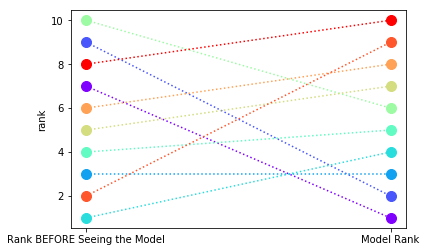

In [109]:
X_before = ['Rank BEFORE Seeing the Model', 'Model Rank']

pair_before_model = []
for x, y in zip(rank_before_model, model_rank):
    pair_before_model.append([x,y])
Y_before = np.array(pair_before_model)


nCols = len(X_before)  
nRows = Y_before.shape[0]

my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Y_before)))

fig, ax = plt.subplots()
for i in range(len(Y_before)):
    ax.plot(np.array([X_before]*nRows)[i], Y_before[i], color=my_colors[i], linestyle=':', marker=".", markersize=20)

plt.ylabel('rank')
plt.show()

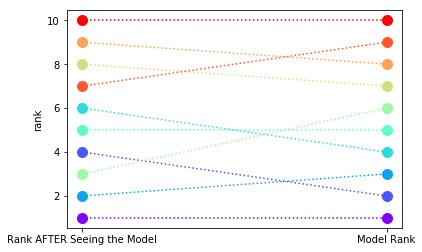

In [114]:
X_after = ['Rank AFTER Seeing the Model', 'Model Rank']

pair_after_model = []
for x, y in zip(rank_after_model, model_rank):
    pair_after_model.append([x,y])
Y_after = np.array(pair_after_model)


nCols = len(X_after)  
nRows = Y_after.shape[0]

my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Y_after)))

fig, ax = plt.subplots()
for i in range(len(Y_after)):
    ax.plot(np.array([X_after]*nRows)[i], Y_after[i], color=my_colors[i], linestyle=':', marker=".", markersize=20)

plt.ylabel('rank')
plt.show()

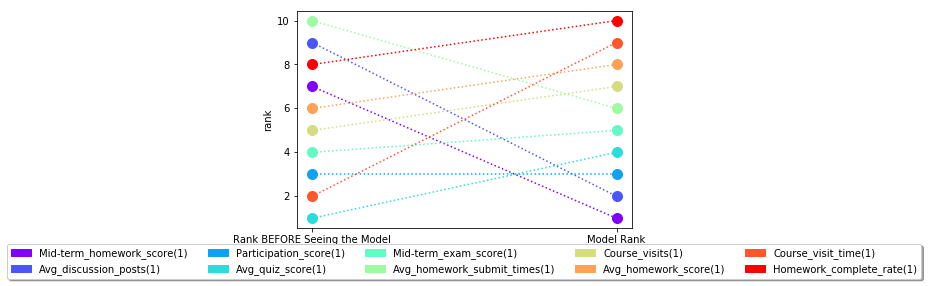

In [119]:
#Put a legend below current axis
import matplotlib.patches as mpatches
X_before = ['Rank BEFORE Seeing the Model', 'Model Rank']

pair_before_model = []
for x, y in zip(rank_before_model, model_rank):
    pair_before_model.append([x,y])
Y_before = np.array(pair_before_model)


nCols = len(X_before)  
nRows = Y_before.shape[0]

my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Y_before)))
legend_dict = {}

fig, ax = plt.subplots()
for i in range(len(Y_before)):
    ax.plot(np.array([X_before]*nRows)[i], Y_before[i], color=my_colors[i], linestyle=':', marker=".", markersize=20)
    legend_dict[i] = mpatches.Patch(color=my_colors[i], label=df_before_model.columns[i])

legend_list = []
for i in range(len(Y_before)):
    legend_list.append(legend_dict[i])
    
plt.legend(handles=legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)    #Put a legend below current axis
plt.ylabel('rank')
plt.show()

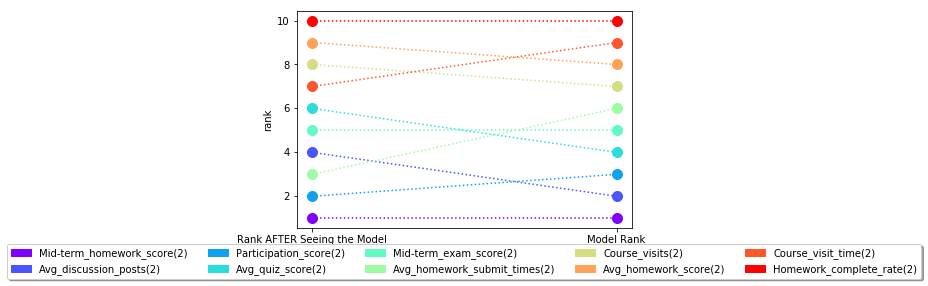

In [120]:
#Put a legend below current axis
X_after = ['Rank AFTER Seeing the Model', 'Model Rank']

pair_after_model = []
for x, y in zip(rank_after_model, model_rank):
    pair_after_model.append([x,y])
Y_after = np.array(pair_after_model)


nCols = len(X_after)  
nRows = Y_after.shape[0]

my_colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(Y_after)))
legend_dict = {}

fig, ax = plt.subplots()
for i in range(len(Y_after)):
    ax.plot(np.array([X_after]*nRows)[i], Y_after[i], color=my_colors[i], linestyle=':', marker=".", markersize=20)
    legend_dict[i] = mpatches.Patch(color=my_colors[i], label=df_after_model.columns[i])

legend_list = []
for i in range(len(Y_after)):
    legend_list.append(legend_dict[i])
    
plt.legend(handles=legend_list, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)    #Put a legend below current axis
plt.ylabel('rank')
plt.show()